In [1]:
import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train_data.csv', na_values="?")
product_prices = pd.read_csv('product_prices.csv', na_values="?")
data_to_week_id_map = pd.read_csv('date_to_week_id_map.csv', na_values="?")

In [3]:
data_to_week_id_map

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49
...,...,...
816,2014-03-27,165
817,2014-03-28,165
818,2014-03-29,166
819,2014-03-30,166


In [4]:
df = pd.merge(product_prices, data_to_week_id_map, on=['week_id'], how='inner')
train_data = pd.merge(df_train, df, on=['date', 'product_identifier', 'outlet'], how='inner')
train_data

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88
...,...,...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98


In [5]:
data = train_data.copy() 

In [6]:
data.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88


In [7]:
data.shape

(395000, 9)

In [8]:
data.describe()

,product_identifier,department_identifier,outlet,sales,week_id,sell_price
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,105.070886,4.987644
std,809.799518,6.337863,91.161291,3.595266,32.578749,3.874444
min,74.000000,11.000000,111.000000,0.000000,49.000000,0.050000
25%,926.000000,21.000000,113.000000,0.000000,77.000000,2.680000
50%,1325.000000,22.000000,221.500000,0.000000,105.000000,3.980000
75%,1753.000000,31.000000,331.000000,1.000000,133.000000,6.480000
max,3021.000000,33.000000,333.000000,293.000000,161.000000,44.360000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395000 entries, 0 to 394999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   395000 non-null  object 
 1   product_identifier     395000 non-null  int64  
 2   department_identifier  395000 non-null  int64  
 3   category_of_product    395000 non-null  object 
 4   outlet                 395000 non-null  int64  
 5   state                  395000 non-null  object 
 6   sales                  395000 non-null  int64  
 7   week_id                395000 non-null  int64  
 8   sell_price             395000 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 27.1+ MB


In [11]:
data["Month"] = pd.to_datetime(data["date"]).dt.month
data = data.drop(columns=["date","week_id"])
data

,product_identifier,department_identifier,category_of_product,outlet,state,sales,sell_price,Month
0,74,11,others,111,Maharashtra,0,2.94,1
1,337,11,others,111,Maharashtra,1,7.44,1
2,423,12,others,111,Maharashtra,0,0.97,1
3,432,12,others,111,Maharashtra,0,4.97,1
4,581,21,fast_moving_consumer_goods,111,Maharashtra,0,4.88,1
...,...,...,...,...,...,...,...,...
394995,2932,33,drinks_and_food,333,Kerala,2,2.78,2
394996,2935,33,drinks_and_food,333,Kerala,8,0.20,2
394997,3004,33,drinks_and_food,333,Kerala,0,2.50,2
394998,3008,33,drinks_and_food,333,Kerala,0,1.98,2


In [12]:
data.columns

Index(['product_identifier', 'department_identifier', 'category_of_product',
       'outlet', 'state', 'sales', 'sell_price', 'Month'],
      dtype='object')

In [14]:
data.duplicated().sum()

353271

In [18]:
data.drop_duplicates().shape

(41729, 8)

In [21]:
data.shape

(41729, 8)

In [22]:
data.drop_duplicates(keep="first", inplace=True)

In [23]:
data.isnull().sum()

product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
sell_price               0
Month                    0
dtype: int64

In [24]:
data.describe()

,product_identifier,department_identifier,outlet,sales,sell_price,Month
count,41729.000000,41729.000000,41729.000000,41729.000000,41729.00000,41729.000000
mean,1690.275468,26.177838,207.293417,4.786575,3.86654,6.277385
std,886.214393,6.689915,91.353066,8.668802,3.32574,3.485531
min,74.000000,11.000000,111.000000,0.000000,0.05000,1.000000
25%,972.000000,21.000000,113.000000,1.000000,2.00000,3.000000
50%,1599.000000,22.000000,221.000000,2.000000,2.98000,6.000000
75%,2768.000000,33.000000,331.000000,5.000000,4.87000,9.000000
max,3021.000000,33.000000,333.000000,293.000000,44.36000,12.000000


Exploratary Data Analysis

In [25]:
data.head()

,product_identifier,department_identifier,category_of_product,outlet,state,sales,sell_price,Month
0,74,11,others,111,Maharashtra,0,2.94,1
1,337,11,others,111,Maharashtra,1,7.44,1
2,423,12,others,111,Maharashtra,0,0.97,1
3,432,12,others,111,Maharashtra,0,4.97,1
4,581,21,fast_moving_consumer_goods,111,Maharashtra,0,4.88,1


In [26]:
data.dtypes

product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
sell_price               float64
Month                      int32
dtype: object

In [27]:
for x in data.dtypes[data.dtypes==object].index:
    print(x, ":")
    print(data[x].value_counts())

category_of_product :
category_of_product
drinks_and_food               20792
fast_moving_consumer_goods    18041
others                         2896
Name: count, dtype: int64
state :
state
Maharashtra    17657
Telangana      12068
Kerala         12004
Name: count, dtype: int64


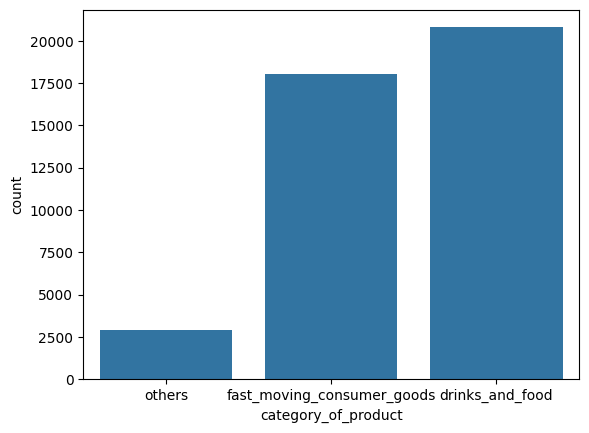

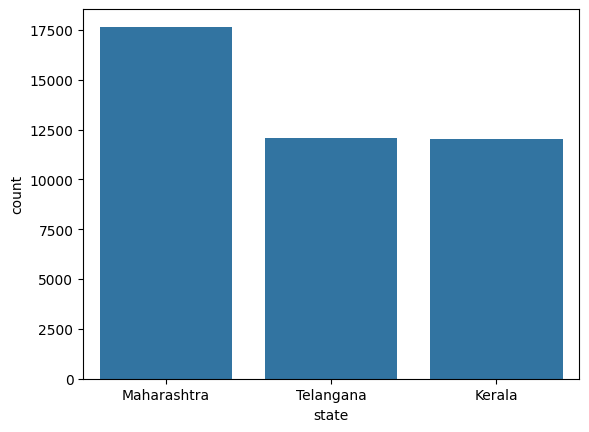

In [28]:
for x in data.dtypes[data.dtypes==object].index:
    plt.figure()
    sns.countplot(data=data, x=x)
    plt.show()

In [29]:
data["sales"].value_counts()

sales
0      8185
1      7280
2      5966
3      4394
4      3237
       ... 
174       1
124       1
119       1
85        1
89        1
Name: count, Length: 126, dtype: int64

<Axes: xlabel='sales', ylabel='Count'>

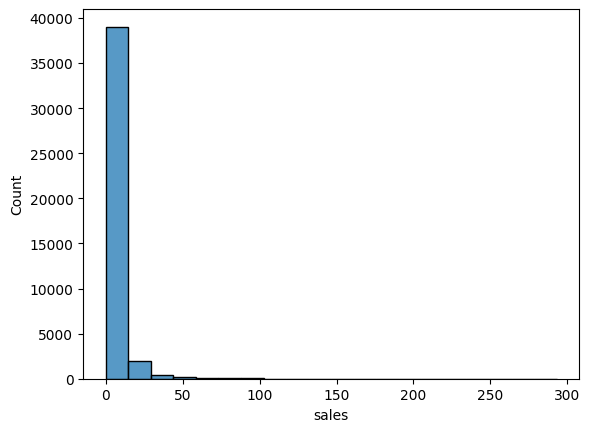

In [30]:
sns.histplot(data["sales"], bins=20)

In [31]:
data["Month"].value_counts()

Month
1     4142
2     4140
8     3514
6     3490
7     3475
5     3394
10    3361
9     3324
4     3299
3     3280
12    3208
11    3102
Name: count, dtype: int64

<Axes: xlabel='Month', ylabel='count'>

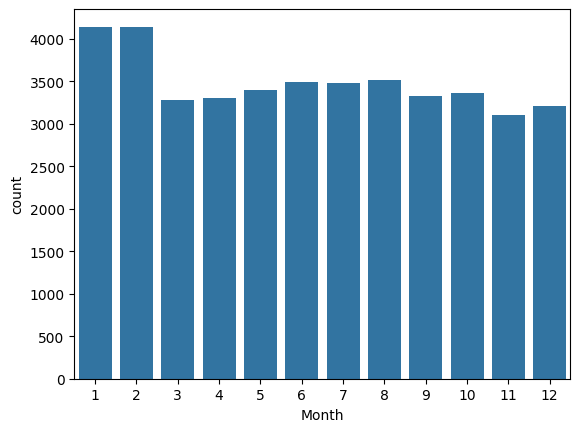

In [33]:
sns.countplot(data=data, x="Month")

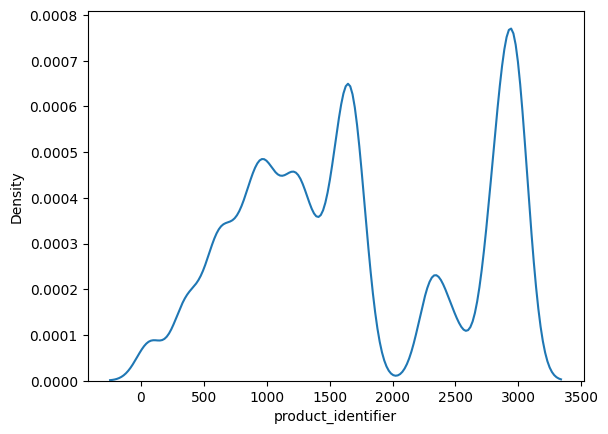

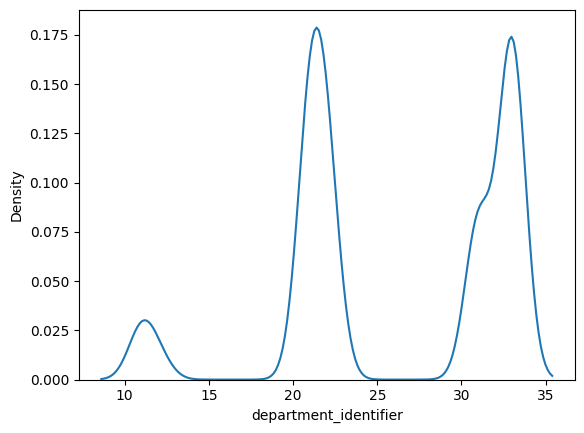

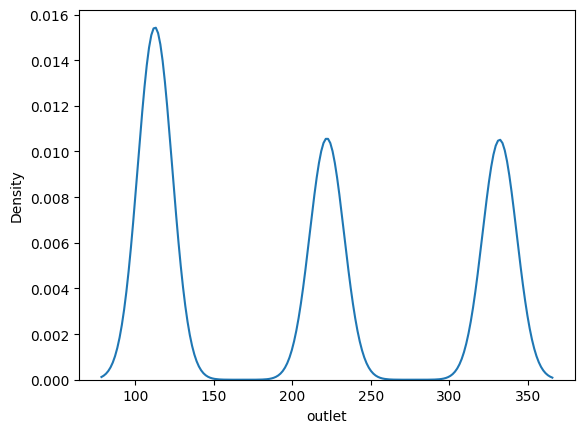

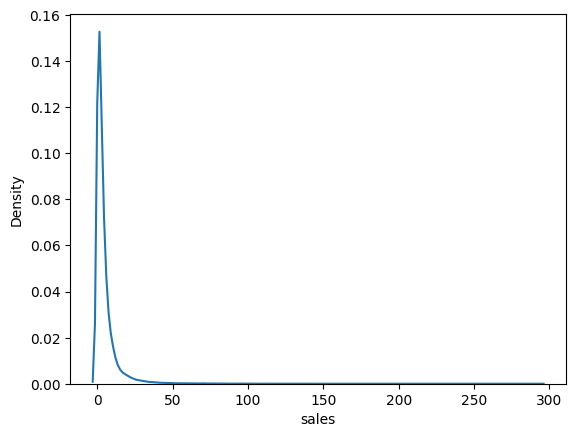

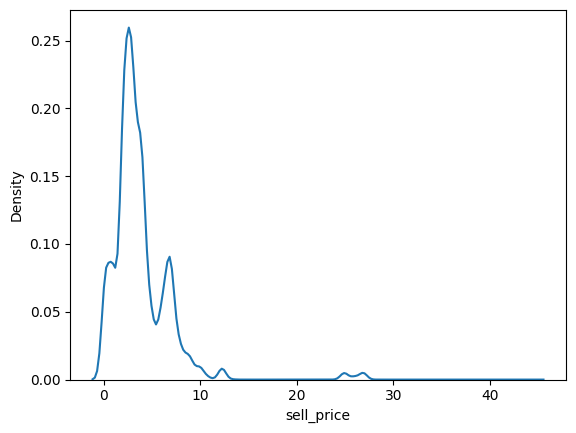

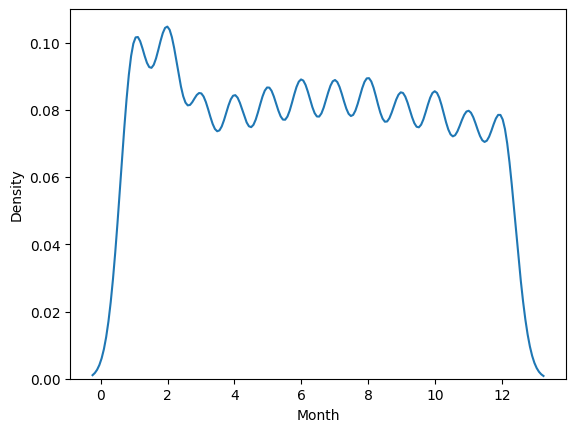

In [34]:
for x in data.dtypes[data.dtypes != object].index:
    plt.figure()
    sns.kdeplot(data=data, x=x)
    plt.show()
    

In [43]:
dFrame = data.select_dtypes(include="number")
dFrame.corr()

,product_identifier,department_identifier,outlet,sales,sell_price,Month
product_identifier,1.000000,0.904896,0.020192,0.242950,-0.304370,0.014821
department_identifier,0.904896,1.000000,0.010530,0.256172,-0.412425,0.004494
outlet,0.020192,0.010530,1.000000,0.018504,-0.005473,-0.001127
sales,0.242950,0.256172,0.018504,1.000000,-0.279240,0.009999
sell_price,-0.304370,-0.412425,-0.005473,-0.279240,1.000000,-0.004640
Month,0.014821,0.004494,-0.001127,0.009999,-0.004640,1.000000


<Axes: >

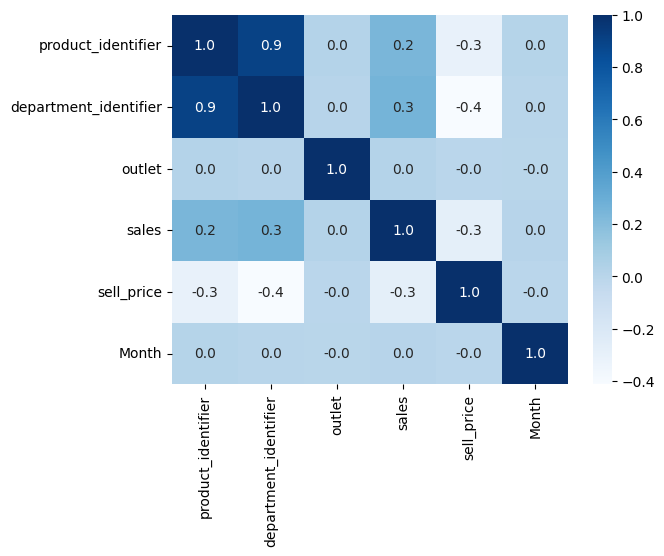

In [44]:
sns.heatmap(dFrame.corr(), fmt=".1f", annot=True, cmap="Blues")

In [48]:
data.head()

,product_identifier,department_identifier,category_of_product,outlet,state,sales,sell_price,Month
0,74,11,others,111,Maharashtra,0,2.94,1
1,337,11,others,111,Maharashtra,1,7.44,1
2,423,12,others,111,Maharashtra,0,0.97,1
3,432,12,others,111,Maharashtra,0,4.97,1
4,581,21,fast_moving_consumer_goods,111,Maharashtra,0,4.88,1


In [51]:
for x in data.dtypes[data.dtypes==object].index:
    print(data[x].value_counts())

category_of_product
drinks_and_food               20792
fast_moving_consumer_goods    18041
others                         2896
Name: count, dtype: int64
state
Maharashtra    17657
Telangana      12068
Kerala         12004
Name: count, dtype: int64


In [52]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

In [53]:
for x in data.dtypes[data.dtypes==object].index:
    data[x] = encoder.fit_transform(data[[x]])

c:\Users\Aditya Mithar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Aditya Mithar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
data.head()

,product_identifier,department_identifier,category_of_product,outlet,state,sales,sell_price,Month
0,74,11,2,111,1,0,2.94,1
1,337,11,2,111,1,1,7.44,1
2,423,12,2,111,1,0,0.97,1
3,432,12,2,111,1,0,4.97,1
4,581,21,1,111,1,0,4.88,1


In [55]:
data["category_of_product"].unique()

array([2, 1, 0])

In [56]:
data["category_of_product"].value_counts()

category_of_product
0    20792
1    18041
2     2896
Name: count, dtype: int64

In [57]:
data["state"].value_counts()

state
1    17657
2    12068
0    12004
Name: count, dtype: int64

<Axes: >

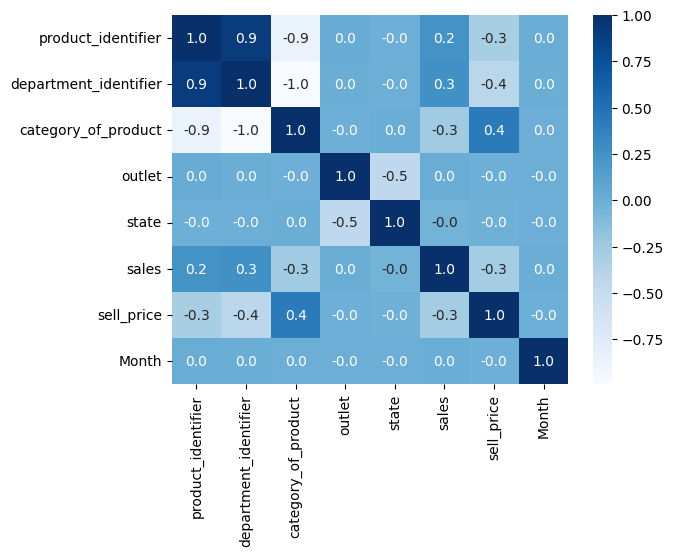

In [58]:
sns.heatmap(data.corr(), fmt=".1f", annot=True, cmap="Blues")

In [59]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column], dataset["sales"])
    plt.ylabel("sales")
    plt.xlabel(column)

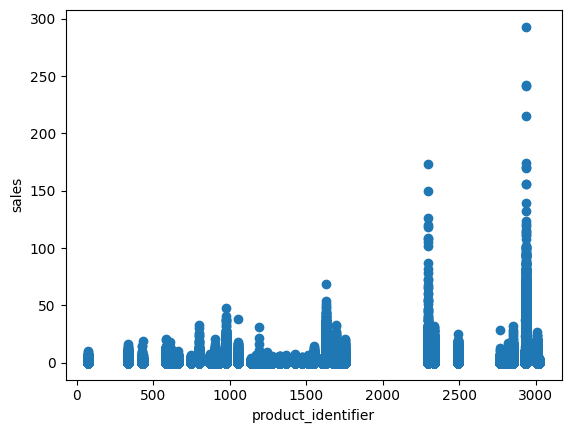

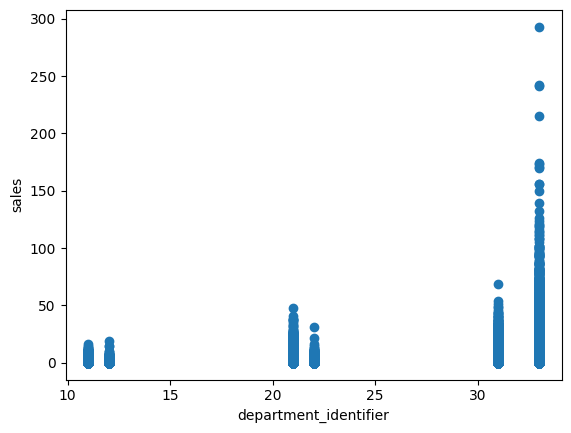

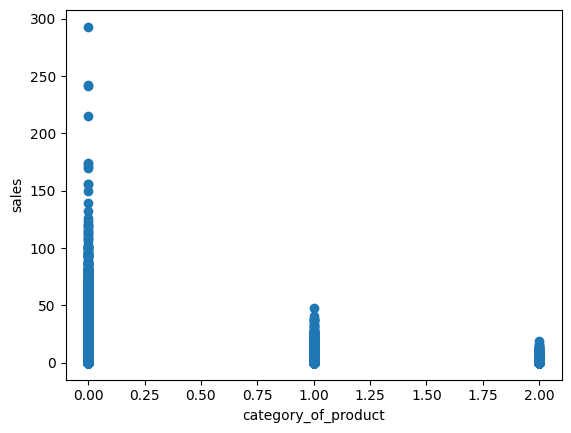

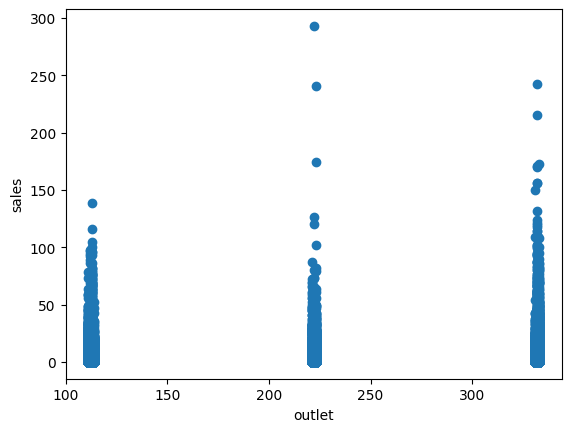

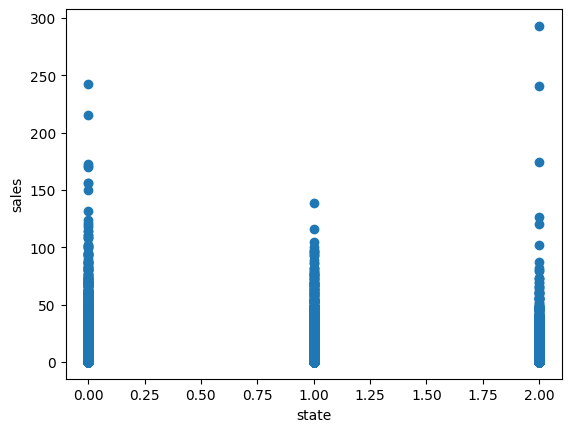

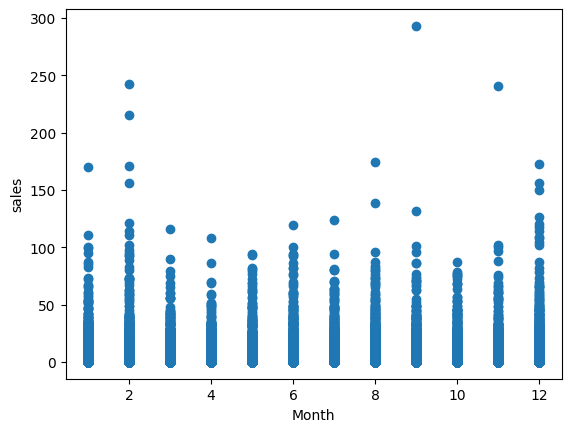

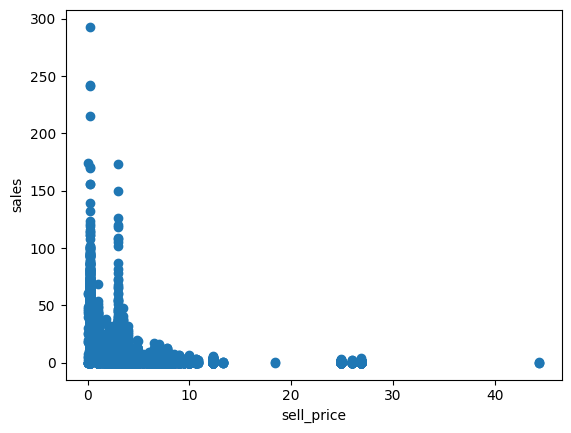

In [61]:
scatter(data, "product_identifier")
scatter(data, "department_identifier")
scatter(data, "category_of_product")
scatter(data, "outlet")
scatter(data, "state")
scatter(data, "Month")
scatter(data, "sell_price")

In [62]:
data.shape

(41729, 8)

In [64]:
def iqr_outlier(data, col):
    out = dict()
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    l_bound = q1-(1.5*iqr)
    u_bound = q3+(1.5*iqr)
    
    for c in range(data.shape[0]):
        try:
            value = data.iloc[x][col]
            if(value<l_bound) | (value>u_bound):
                #print("detected")
                if col in out:
                    out[col].append(x)
                else:
                    out[col] = list()
        except KeyError:
            print(f"Index {x} does not exist in DataFrame for column {col}")
        except Exception as e:
            print(f"An error occurred: {e}") 
            
    return out

In [65]:
data.shape[0]

41729

<Axes: ylabel='Density'>

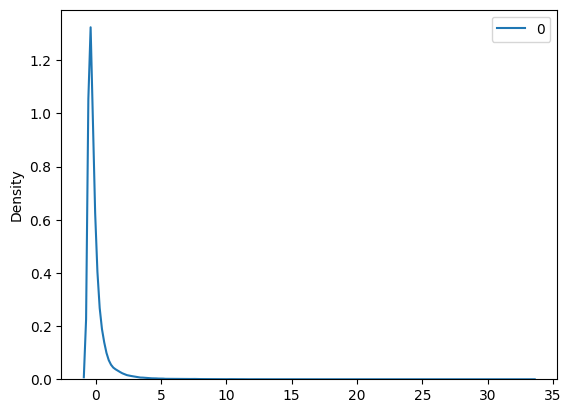

In [66]:
from sklearn.preprocessing import StandardScaler
sns.kdeplot(StandardScaler().fit_transform(data[["sales"]]))

In [69]:
StandardScaler().fit_transform(data[["sales"]]).std()

0.9999999999999999

In [70]:
data.head()

,product_identifier,department_identifier,category_of_product,outlet,state,sales,sell_price,Month
0,74,11,2,111,1,0,2.94,1
1,337,11,2,111,1,1,7.44,1
2,423,12,2,111,1,0,0.97,1
3,432,12,2,111,1,0,4.97,1
4,581,21,1,111,1,0,4.88,1


In [ ]:
data["o"]